In [88]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [89]:
# Read and merge datasets
population_data = pd.read_csv('Cleaned Datasets/cleaned_population_data.csv', index_col="Unnamed: 0")
population_data = population_data.convert_dtypes()
# Population data uses 'UNITED STATES'
education_2017 = pd.read_csv('Cleaned Datasets/CleanedEducationData1870_2017.csv')
education_2017 = education_2017.convert_dtypes()
# education_2017 uses 'UNITED STATES'
world_gdp = pd.read_csv('Cleaned Datasets/World_GDP_cleaned.csv')
world_gdp = world_gdp.convert_dtypes()
# world_gdp uses 'UNITED STATES'
education_wgdp = pd.merge(education_2017, world_gdp, on=['Code', 'Year'],how='inner', indicator=True)
education_wgdp = education_wgdp.rename(columns={"Country_x": "Country"})
data_fertility_rate = pd.read_csv('Cleaned Datasets/cleaned_fertility_data.csv', index_col="Unnamed: 0")
data_fertility_rate = data_fertility_rate.convert_dtypes()
data_fertility_rate = data_fertility_rate.replace("UNITED STATES OF AMERICA", "UNITED STATES")
# data_fertility_rate uses 'UNITED STATES'

In [90]:
data_with_population = pd.merge(education_wgdp, population_data, on=['Country', 'Year'] , how='inner')
df = pd.merge(data_with_population, data_fertility_rate, on=['Country', 'Year'] , how='inner')
del df['Country_y']
del df['Region']
del df['_merge']
del df['Area in Square Kilometers']
df

,Country,Code,Year,avg_years_of_schooling,GDP,GENC,Population,Male Population,Female Population,Annual Growth Rate %,...,"Age 1-4 Mortality, Males","Age 1-4 Mortality, Females","Under Age 5 Mortality, Both Sexes","Under Age 5 Mortality, Males","Under Age 5 Mortality, Females",Crude Death Rate,"Deaths, both sexes",Net Migration Rate,"Net international migrants, both sexes",Fertility Rate
0,AFGHANISTAN,AFG,1965,0.29,1006666637.77778,AF,10997885,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,7.97
1,AFGHANISTAN,AFG,1970,0.35,1748886595.55556,AF,12430623,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,7.98
2,AFGHANISTAN,AFG,1975,0.62,2366666615.55556,AF,14132019,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,8.45
3,AFGHANISTAN,AFG,1990,1.49,<NA>,AF,13568282,6923599,6644683,-1.93,...,97.1,103.8,251.3,255.7,246.7,22.5,305242,-51.2,-695106,7.73
4,AFGHANISTAN,AFG,1991,1.6,<NA>,AF,13671918,6973080,6698838,3.43,...,94.9,101.3,246.3,250.9,241.5,22.3,304574,2.4,32794,7.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3753,ZIMBABWE,ZWE,2011,7.3,14101920300.0,ZW,13268320,6437525,6830795,0.25,...,28.5,27.1,75.5,81.2,69.7,10.9,144644,-22.8,-303080,4.29
3754,ZIMBABWE,ZWE,2012,7.9,17114849900.0,ZW,13322711,6438103,6884608,0.57,...,25.3,23.9,70.4,75.9,64.8,10.1,134850,-20.2,-269564,3.81
3755,ZIMBABWE,ZWE,2013,8.0,19091020000.0,ZW,13504275,6515318,6988957,2.13,...,22.5,21.2,65.7,71.0,60.3,9.4,127346,-5.0,-67451,4.21
3756,ZIMBABWE,ZWE,2014,8.2,19495519600.0,ZW,13791770,6656860,7134910,2.08,...,21.2,19.9,63.2,68.3,57.9,9.1,125927,-5.5,-75299,4.02


In [91]:
df.to_csv("Cleaned Datasets/Merged_data.csv",index = False)

Our dataset is a combination of four datasets which contained data on GDP, education, population, and fertility rate. Each dataset was cleaned and pivoted individually in other notebooks and merged in the cells above. The datasets were merged on country code and country name. We used inner merges exclusively to help deal with missing values. Each row corresponds to a country and a year. Many columns of data were stored as strings, and we converted them to numeric values when appropriate, as well as other basic data cleaning steps.
Using inner merges to deal with missing values results in a much smaller dataset, perhaps a third of the size as what we might have had with outer merges. Some loss of data is inevitable, but in the future we may check why exactly certain years and countries are being dropped and whether that data might be found through other sources. However, even after aggressively dropping missing data we still have enough countries with a full dataset to form a training and a testing group for our models. 

We have plotted below the GDP available for a few countries

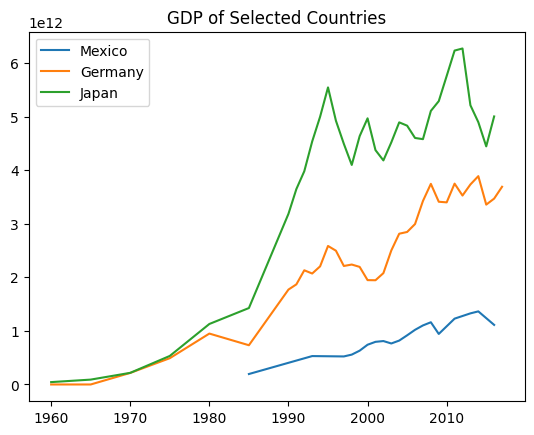

In [94]:
mexicoData = df[df['Country'] == "MEXICO"].fillna(0)
germanyData = df[df['Country'] == "GERMANY"].fillna(0)
japanData = df[df['Country'] == "JAPAN"].fillna(0)
plt.plot(mexicoData['Year'], mexicoData['GDP'], label="Mexico")
plt.plot(germanyData['Year'], germanyData['GDP'], label="Germany")
plt.plot(japanData['Year'], japanData['GDP'], label="Japan")
plt.title("GDP of Selected Countries")
plt.legend()
plt.show()

A critical aspect of our project data is handling null values, because for many countries, especially smaller and developing countries, data is not available. The following is a chart of non-null values over time:

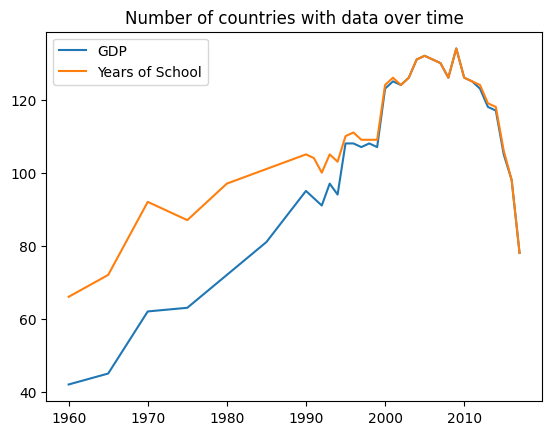

In [95]:
plt.plot(np.unique(df["Year"].values),df.groupby("Year")[["GDP","avg_years_of_schooling"]].count().values,label = ["GDP","Years of School"])
plt.legend()
plt.title("Number of countries with data over time")
plt.show()

This graph shows the amount of data we have per year on GDP and Years of school. The most amount of data we have is in the 2000-2017 range. Since the focus of our project will be primarily on developed economies with lots of data available, we will mostly ignore data points with null values.

Our theoretical model will account for fixed effects by country and by year, which will allow us to remove variation that occurs across the globe in specific years (recessions, etc) as well as account for the specific conditions in a country that persist over the entire timeframe - such as culture, average health, etc. We would like to include country by year fixed effects, but that is obviously impossible. To combat that we will include a number of other control variables such as average years of education, infant mortality rate, and others in the hope that these covariates will help to explain variation in gdp not due to changes in demographics. 

The main question we are interested in answering is how the demographic composition of a country impacts its growth rate. A first approximation is to just use the fertility rate in past decades to explain the gdp growth today. We may also explore more complicated models that use the entire age breakdown of a country into certain brackets to predict GDP growth. 
As a justification for how fertility rate impacts GDP growth, it seems logical to suppose that the fertility rate this year is negatively correlated with growth, since it removes parents from the labor force. However, fertility rate from twenty to sixty years ago should be correlated with more people of workign age, and presumably higher growth. Finally, births from over about 60 years ago likely contribute negatively to growth as those people work in lower numbers and while still consuming the country's resources. For an example of all three stages, consider Japan since World War 2. 

Bellow is an example of data cleaning for population and fertility data.